# 第十五章 智能推荐系统 - 协同过滤算法

## 15.2 相似度计算三种常见方法

### 15.2.1 欧式距离

In [1]:
import pandas as pd
df = pd.DataFrame([[5, 1, 5], [4, 2, 2], [4, 2, 1]], columns=['用户1', '用户2', '用户3'], index=['物品A', '物品B', '物品C'])
df

,用户1,用户2,用户3
物品A,5,1,5
物品B,4,2,2
物品C,4,2,1


In [2]:
import numpy as np
dist = np.linalg.norm(df.iloc[0] - df.iloc[1])
dist

3.3166247903554

### 15.2.2 余弦内置函数

In [3]:
import pandas as pd
df = pd.DataFrame([[5, 1, 5], [4, 2, 2], [4, 2, 1]], columns=['用户1', '用户2', '用户3'], index=['物品A', '物品B', '物品C'])
df

,用户1,用户2,用户3
物品A,5,1,5
物品B,4,2,2
物品C,4,2,1


In [4]:
from sklearn.metrics.pairwise import cosine_similarity
user_similarity = cosine_similarity(df)
pd.DataFrame(user_similarity, columns=['物品A', '物品B', '物品C'], index=['物品A', '物品B', '物品C'])

,物品A,物品B,物品C
物品A,1.000000,0.914659,0.825029
物品B,0.914659,1.000000,0.979958
物品C,0.825029,0.979958,1.000000


### 15.2.3 皮尔逊相关系数简单版

In [5]:
from scipy.stats import pearsonr
X = [1, 3, 5, 7, 9]
Y = [9, 8, 6, 4, 2]
corr = pearsonr(X, Y)
print('相关系数r值为' + str(corr[0]) + '，显著性水平P值为' + str(corr[1]))

相关系数r值为-0.9938837346736188，显著性水平P值为0.0005736731093322215


# 皮尔逊相关系数小案例

In [6]:
import pandas as pd
df = pd.DataFrame([[5, 4, 4], [1, 2, 2], [5, 2, 1]], columns=['物品A', '物品B', '物品C'], index=['用户1', '用户2', '用户3'])  

In [7]:
df

,物品A,物品B,物品C
用户1,5,4,4
用户2,1,2,2
用户3,5,2,1


In [8]:
# 物品A与其他物品的皮尔逊相关系数
A = df['物品A']
corr_A = df.corrwith(A)
corr_A

物品A    1.000000
物品B    0.500000
物品C    0.188982
dtype: float64

In [9]:
# 皮尔逊系数表，获取各物品相关性
df.corr()

,物品A,物品B,物品C
物品A,1.000000,0.500000,0.188982
物品B,0.500000,1.000000,0.944911
物品C,0.188982,0.944911,1.000000


## 15.3 案例实战 - 电影智能推荐系统

1.读取数据

In [10]:
import pandas as pd 
movies = pd.read_excel('电影.xlsx')
movies.head()

,电影编号,名称,类别
0,1,玩具总动员（1995）,冒险|动画|儿童|喜剧|幻想
1,2,勇敢者的游戏（1995）,冒险|儿童|幻想
2,3,斗气老顽童2（1995）,喜剧|爱情
3,4,待到梦醒时分（1995）,喜剧|剧情|爱情
4,5,新娘之父2（1995）,喜剧


In [11]:
score = pd.read_excel('评分.xlsx')
score.head()

,用户编号,电影编号,评分
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [12]:
df = pd.merge(movies, score, on='电影编号')
df.head()

,电影编号,名称,类别,用户编号,评分
0,1,玩具总动员（1995）,冒险|动画|儿童|喜剧|幻想,1,4.0
1,1,玩具总动员（1995）,冒险|动画|儿童|喜剧|幻想,5,4.0
2,1,玩具总动员（1995）,冒险|动画|儿童|喜剧|幻想,7,4.5
3,1,玩具总动员（1995）,冒险|动画|儿童|喜剧|幻想,15,2.5
4,1,玩具总动员（1995）,冒险|动画|儿童|喜剧|幻想,17,4.5


In [13]:
df.to_excel('电影推荐系统.xlsx')

In [14]:
df['评分'].value_counts()  # 查看各个评分的出现的次数

4.0    26794
3.0    20017
5.0    13180
3.5    13129
4.5     8544
2.0     7545
2.5     5544
1.0     2808
1.5     1791
0.5     1369
Name: 评分, dtype: int64

In [16]:
%matplotlib inline

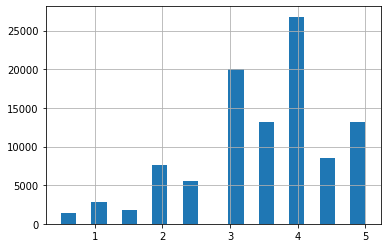

In [17]:
import matplotlib.pyplot as plt
df['评分'].hist(bins=20)  # hist()函数绘制直方图，竖轴为各评分出现的次数

2.数据分析

In [18]:
ratings = pd.DataFrame(df.groupby('名称')['评分'].mean())
ratings.sort_values('评分', ascending=False).head()

,评分
名称,
假小子（1997）,5.0
福尔摩斯和华生医生历险记：讹诈之王（1980）,5.0
机器人（2016）,5.0
奥斯卡（1967）,5.0
人类状况III（1961）,5.0


In [19]:
ratings['评分次数'] = df.groupby('名称')['评分'].count()
ratings.sort_values('评分次数', ascending=False).head()

,评分,评分次数
名称,,
阿甘正传（1994）,4.164134,329
肖申克的救赎（1994）,4.429022,317
低俗小说（1994）,4.197068,307
沉默的羔羊（1991）,4.161290,279
黑客帝国（1999）,4.192446,278


3.数据处理

In [20]:
user_movie = df.pivot_table(index='用户编号', columns='名称', values='评分')
user_movie.tail()

名称,007之黄金眼（1995）,100个女孩（2000）,100条街道（2016）,101忠狗续集:伦敦大冒险（2003）,101忠狗（1961）,101雷克雅未克（2000）,102只斑点狗（2000）,10件或更少（2006）,10（1979）,11:14（2003）,...,龙珠：神秘冒险（1988）,龙珠：血红宝石的诅咒（1986）,龙珠：魔鬼城堡中的睡公主（1987）,龙种子（1944）,龙纹身的女孩（2011）,龙舌兰日出（1988）,龙虾（2015）,龙：夜之怒的礼物（2011）,龙：李小龙的故事（1993）,龟日记（1985）
用户编号,,,,,,,,,,,,,,,,,,,,,
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN


In [21]:
user_movie.describe()  # 因为数据量较大，这个耗时可能会有1分钟左右

名称,007之黄金眼（1995）,100个女孩（2000）,100条街道（2016）,101忠狗续集:伦敦大冒险（2003）,101忠狗（1961）,101雷克雅未克（2000）,102只斑点狗（2000）,10件或更少（2006）,10（1979）,11:14（2003）,...,龙珠：神秘冒险（1988）,龙珠：血红宝石的诅咒（1986）,龙珠：魔鬼城堡中的睡公主（1987）,龙种子（1944）,龙纹身的女孩（2011）,龙舌兰日出（1988）,龙虾（2015）,龙：夜之怒的礼物（2011）,龙：李小龙的故事（1993）,龟日记（1985）
count,132.000000,4.00,1.0,1.0,44.000000,1.0,9.000000,3.000000,4.000000,4.00,...,1.0,1.0,2.000000,1.0,42.000000,13.000000,7.000000,1.0,8.00000,2.0
mean,3.496212,3.25,2.5,2.5,3.431818,3.5,2.777778,2.666667,3.375000,3.75,...,3.5,3.5,3.250000,3.5,3.488095,3.038462,4.000000,5.0,2.81250,4.0
std,0.859381,0.50,NaN,NaN,0.751672,NaN,0.833333,1.040833,1.030776,0.50,...,NaN,NaN,0.353553,NaN,1.327422,0.431158,0.707107,NaN,1.03294,0.0
min,0.500000,2.50,2.5,2.5,1.500000,3.5,2.000000,1.500000,2.000000,3.00,...,3.5,3.5,3.000000,3.5,0.500000,2.000000,3.000000,5.0,0.50000,4.0
25%,3.000000,3.25,2.5,2.5,3.000000,3.5,2.000000,2.250000,3.125000,3.75,...,3.5,3.5,3.125000,3.5,2.625000,3.000000,3.500000,5.0,2.87500,4.0
50%,3.500000,3.50,2.5,2.5,3.500000,3.5,2.500000,3.000000,3.500000,4.00,...,3.5,3.5,3.250000,3.5,4.000000,3.000000,4.000000,5.0,3.00000,4.0
75%,4.000000,3.50,2.5,2.5,4.000000,3.5,3.000000,3.250000,3.750000,4.00,...,3.5,3.5,3.375000,3.5,4.000000,3.000000,4.500000,5.0,3.12500,4.0
max,5.000000,3.50,2.5,2.5,5.000000,3.5,4.500000,3.500000,4.500000,4.00,...,3.5,3.5,3.500000,3.5,5.000000,4.000000,5.000000,5.0,4.00000,4.0


4.智能推荐

In [22]:
FG = user_movie['阿甘正传（1994）']  # FG是Forrest Gump（），阿甘英文名称的缩写
pd.DataFrame(FG).head()

,阿甘正传（1994）
用户编号,
1,4.0
2,NaN
3,NaN
4,NaN
5,NaN


In [23]:
# axis默认为0，计算user_movie各列与FG的相关系数
corr_FG = user_movie.corrwith(FG)
similarity = pd.DataFrame(corr_FG, columns=['相关系数'])
similarity.head()

C:\Users\LYJZB\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\LYJZB\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,相关系数
名称,
007之黄金眼（1995）,0.217441
100个女孩（2000）,NaN
100条街道（2016）,NaN
101忠狗续集:伦敦大冒险（2003）,NaN
101忠狗（1961）,0.141023


In [24]:
similarity.dropna(inplace=True)  # 或写成similarity=similarity.dropna()
similarity.head()

,相关系数
名称,
007之黄金眼（1995）,0.217441
101忠狗（1961）,0.141023
102只斑点狗（2000）,-0.857589
10件或更少（2006）,-1.000000
11:14（2003）,0.500000


In [25]:
similarity_new = pd.merge(similarity, ratings['评分次数'], left_index=True, right_index=True)
similarity_new.head()

,相关系数,评分次数
名称,,
007之黄金眼（1995）,0.217441,132
101忠狗（1961）,0.141023,44
102只斑点狗（2000）,-0.857589,9
10件或更少（2006）,-1.000000,3
11:14（2003）,0.500000,4


In [26]:
# 第二种合并方式
similarity_new = similarity.join(ratings['评分次数'])
similarity_new.head()

,相关系数,评分次数
名称,,
007之黄金眼（1995）,0.217441,132
101忠狗（1961）,0.141023,44
102只斑点狗（2000）,-0.857589,9
10件或更少（2006）,-1.000000,3
11:14（2003）,0.500000,4


In [27]:
similarity_new[similarity_new['评分次数'] > 20].sort_values(by='相关系数', ascending=False).head()  # 选取阈值

,相关系数,评分次数
名称,,
阿甘正传（1994）,1.000000,329
抓狂双宝（1996）,0.723238,31
雷神：黑暗世界（2013）,0.715809,21
致命吸引力（1987）,0.701856,36
X战警：未来的日子（2014）,0.682284,30


# 补充知识点：groupby()函数的使用

In [28]:
import pandas as pd
data = pd.DataFrame([['战狼2', '丁一', 6, 8], ['攀登者', '王二', 8, 6], ['攀登者', '张三', 10, 8], ['卧虎藏龙', '李四', 8, 8], ['卧虎藏龙', '赵五', 8, 10]], columns=['电影名称', '影评师', '观前评分', '观后评分'])

In [29]:
data

,电影名称,影评师,观前评分,观后评分
0,战狼2,丁一,6,8
1,攀登者,王二,8,6
2,攀登者,张三,10,8
3,卧虎藏龙,李四,8,8
4,卧虎藏龙,赵五,8,10


In [30]:
means = data.groupby('电影名称')[['观后评分']].mean()
means

,观后评分
电影名称,
卧虎藏龙,9.0
战狼2,8.0
攀登者,7.0


In [31]:
means = data.groupby('电影名称')[['观前评分', '观后评分']].mean()
means

,观前评分,观后评分
电影名称,,
卧虎藏龙,8.0,9.0
战狼2,6.0,8.0
攀登者,9.0,7.0


In [32]:
means = data.groupby(['电影名称', '影评师'])[['观后评分']].mean()
means

观后评分
电影名称 影评师      
卧虎藏龙 李四    8.0
     赵五   10.0
战狼2  丁一    8.0
攀登者  张三    8.0
     王二    6.0

In [33]:
count = data.groupby('电影名称')[['观后评分']].count()
count

,观后评分
电影名称,
卧虎藏龙,2
战狼2,1
攀登者,2


In [34]:
count = count.rename(columns={'观后评分':'评分次数'})
count

,评分次数
电影名称,
卧虎藏龙,2
战狼2,1
攀登者,2
